In [2]:
import pandas as pd
import pandautils as pup
import numpy as np
from rootpy.vector import LorentzVector, Vector3
from rootpy.plotting.style import get_style, set_style
import matplotlib.pyplot as plt
import fit
 

In [5]:
# -- open a file to svae the names of the branches we are interested in (the ones containing Muons or Jets)
from rootpy.io import root_open
#f = root_open("../MxAOD/Truth_11-30/user.mpaganin.mc15_13TeV.341175.A14NNPDF23LO_X350tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.Truth_11-30_MxAOD.root/user.mpaganin.7141844._000001.MxAOD.root", "read")
f = root_open("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341175.A14NNPDF23LO_X350tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.3.0test_MxAOD.root/user.mpaganin.7475070._000001.MxAOD.root", "read")
t = f["CollectionTree"]
print [key.GetName() for key in t.GetListOfBranches() if 'weight' in key.GetName()]
features = [key.GetName() for key in t.GetListOfBranches() if (
        ('HGamMuonsAuxDyn' in key.GetName()) 
        or ('HGamAntiKt4EMTopoJetsAuxDyn' in key.GetName()) 
        or ('HGamPhotonsAuxDyn' in key.GetName()) 
        or ('HH2yybbEventInfoAuxDyn' in key.GetName())
    )]
f.Close()

['HH2yybbEventInfoAuxDyn.weightInitial', 'HH2yybbEventInfoAuxDyn.weight', 'HH2yybbEventInfoAuxDyn.weightCatCoup_dev', 'HH2yybbEventInfoAuxDyn.weightFinal', 'HH2yybbEventInfoAuxDyn.weightCatCoup_Moriond2016']


False

In [6]:
features

['HGamPhotonsAuxDyn.isTight',
 'HGamPhotonsAuxDyn.isIsoFixedCutLoose',
 'HGamPhotonsAuxDyn.topoetcone20',
 'HGamPhotonsAuxDyn.isIsoFixedCutTight',
 'HGamPhotonsAuxDyn.isIsoFixedCutTightCaloOnly',
 'HGamPhotonsAuxDyn.relEreso',
 'HGamPhotonsAuxDyn.isEMTight',
 'HGamPhotonsAuxDyn.topoetcone40',
 'HGamPhotonsAuxDyn.conversionType',
 'HGamPhotonsAuxDyn.conversionRadius',
 'HGamPhotonsAuxDyn.truthOrigin',
 'HGamPhotonsAuxDyn.truthType',
 'HGamPhotonsAuxDyn.pt',
 'HGamPhotonsAuxDyn.eta',
 'HGamPhotonsAuxDyn.ptcone20',
 'HGamPhotonsAuxDyn.phi',
 'HGamPhotonsAuxDyn.ptcone40',
 'HGamPhotonsAuxDyn.m',
 'HGamPhotonsAuxDyn.isTight_nofudge',
 'HGamPhotonsAuxDyn.isEMTight_nofudge',
 'HGamPhotonsAuxDyn.eta_s2',
 'HGamAntiKt4EMTopoJetsAuxDyn.Jvt',
 'HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_85_Eff',
 'HGamAntiKt4EMTopoJetsAuxDyn.SF_MV2c20_85',
 'HGamAntiKt4EMTopoJetsAuxDyn.DetectorEta',
 'HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_discriminant',
 'HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_60',
 'HGamAntiKt4EMTopoJetsAuxDyn

In [7]:
# -- 'muon2' means that the m_bb window cut was opened up from [95,135] GeV to [] GeV
# X350_df = pup.root2panda("../MxAOD/muons/muons2/user.mpaganin.mc15_13TeV.341175.A14NNPDF23LO_X350tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.muons2_MxAOD.root/*", "CollectionTree",
#                         branches = features) 
# H300_df = pup.root2panda("../MxAOD/muons/muons2/user.mpaganin.mc15_13TeV.341004.A14NNPDF23LO_H300_Xtohh_yybb.merge.DAOD_HIGG1D1.e3846_a766_a768_r6282_p2421.muons2_MxAOD.root/*", "CollectionTree", 
#                         branches = features)
X400_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341176.A14NNPDF23LO_X400tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)
X350_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341175.A14NNPDF23LO_X350tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)
X325_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341174.A14NNPDF23LO_X325tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)
H300_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341004.A14NNPDF23LO_H300_Xtohh_yybb.merge.DAOD_HIGG1D1.e3846_a766_a768_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)
X275_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341173.A14NNPDF23LO_X275tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)

X300w15G_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.342090.A14NNPDF23LO_X300w15Gtohh_yybb..e4114_a766_a777_r6282.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)

In [8]:
yybj_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341063.A14NNPDF23LO_yybj.merge.DAOD_HIGG1D1.e4292_a766_a777_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)
yybb_df = pup.root2panda("../MxAOD/framework-00-03-00_rel2.3.38/muons/user.mpaganin.mc15_13TeV.341061.A14NNPDF23LO_yybb.merge.DAOD_HIGG1D1.e3939_a766_a768_r6282_p2421.3.0test_MxAOD.root/*",
                        "CollectionTree", branches = features)

In [9]:
#signal_df = pd.concat([X400_df,X350_df,X325_df,H300_df,X275_df], ignore_index=True)
#signal_df = H300_df
signal_df = X350_df

In [10]:
# -- hack to only consider events that pass the cutflow (excluding the m_bb cut, which gets opened up in a larger window)
signal_df = signal_df[signal_df['HH2yybbEventInfoAuxDyn.m_yyjj'] != -99]

In [11]:
class Jet(object):
    """
    Better Jet Class!

    Example:

    >>> j = Jet(100.1, 1.2, 1.0, 12, 1) # instantiation with assignment
    >>> j.lv.Pt() # print pt
    100.1
    >>> j.pt = 205 # assign pt
    >>> j.lv.Pt()
    205

    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0, btag = 0):
        super(Jet, self).__init__()

        self.btag = btag
        
        # -- hidden to most usage
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m

        # -- Lorentz 4-vector
        self.lv = LorentzVector()
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    def _internal_update(self):
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    @property
    def pt(self):
        return self._pt

    @pt.setter
    def pt(self, value):
        self._pt = value
        self._internal_update()
        
    @property
    def eta(self):
        return self._eta

    @eta.setter
    def eta(self, value):
        self._eta = value
        self._internal_update()        

    @property
    def phi(self):
        return self._phi

    @phi.setter
    def phi(self, value):
        self._phi = value
        self._internal_update()
        
    @property
    def m(self):
        return self._m

    @m.setter
    def m(self, value):
        self._m = value
        self._internal_update()


In [12]:
class Photon(object):
    """
    Photon Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0):
        super(Photon, self).__init__()
        
        # -- hidden to most usage
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m

        # -- Lorentz 4-vector
        self.lv = LorentzVector()
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    def _internal_update(self):
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    @property
    def pt(self):
        return self._pt

    @pt.setter
    def pt(self, value):
        self._pt = value
        self._internal_update()
        
    @property
    def eta(self):
        return self._eta

    @eta.setter
    def eta(self, value):
        self._eta = value
        self._internal_update()        

    @property
    def phi(self):
        return self._phi

    @phi.setter
    def phi(self, value):
        self._phi = value
        self._internal_update()
        
    @property
    def m(self):
        return self._m

    @m.setter
    def m(self, value):
        self._m = value
        self._internal_update()


In [13]:
class Muon(object):
    """
    Muon Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0):
        super(Muon, self).__init__()
        
        # -- hidden to most usage
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m

        # -- Lorentz 4-vector
        self.lv = LorentzVector()
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    def _internal_update(self):
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    @property
    def pt(self):
        return self._pt

    @pt.setter
    def pt(self, value):
        self._pt = value
        self._internal_update()
        
    @property
    def eta(self):
        return self._eta

    @eta.setter
    def eta(self, value):
        self._eta = value
        self._internal_update()        

    @property
    def phi(self):
        return self._phi

    @phi.setter
    def phi(self, value):
        self._phi = value
        self._internal_update()
        
    @property
    def m(self):
        return self._m

    @m.setter
    def m(self, value):
        self._m = value
        self._internal_update()


In [14]:
jets = [Jet(pt, eta, phi, m, btag) for (pt, eta, phi, m, btag) in zip(
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.pt']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.eta']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.phi']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.m']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_85'])
    )]

jets = pup.match_shape(np.array(jets), signal_df['HGamAntiKt4EMTopoJetsAuxDyn.pt'])

In [15]:
photons = [Photon(pt, eta, phi, m) for (pt, eta, phi, m) in zip(
    pup.flatten(signal_df['HGamPhotonsAuxDyn.pt']),
    pup.flatten(signal_df['HGamPhotonsAuxDyn.eta']),
    pup.flatten(signal_df['HGamPhotonsAuxDyn.phi']),
    pup.flatten(signal_df['HGamPhotonsAuxDyn.m'])
    )]

photons = pup.match_shape(np.array(photons), signal_df['HGamPhotonsAuxDyn.pt'])

In [16]:
muons = [Muon(pt, eta, phi, 105.65837) for (pt, eta, phi) in zip(
    pup.flatten(signal_df['HGamMuonsAuxDyn.pt']),
    pup.flatten(signal_df['HGamMuonsAuxDyn.eta']),
    pup.flatten(signal_df['HGamMuonsAuxDyn.phi'])
    )]

muons = pup.match_shape(np.array(muons), signal_df['HGamMuonsAuxDyn.pt'])

In [17]:
# -- cut out only b-jets
bjets = [((np.array(jets[evn]))[signal_df['HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_85'][ev] == 1]).tolist() for (evn,ev) 
         in enumerate(signal_df.index.values) ] # in xrange(len(jets)
                                                                                                         

In [18]:
# -- check percentage of events that have == 2 b-jets 
100*float(sum([(len(bjets[ev]) == 2) for ev in xrange(len(bjets))]))/float(len(bjets))

45.05910708137266

In [19]:
# -- select events with == 2 b-tagged jets (2-Tag Category)
a = [(len(bjets[ev]) == 2) for ev in xrange(len(bjets))] 
bjets_2 = np.array(bjets)[np.array(a)]
photons_2 = np.array(photons)[np.array(a)]
muons_2 = np.array(muons)[np.array(a)]

In [20]:
def deltaR(eta1, eta2, phi1, phi2):
    import math
    '''
    Definition:
    -----------
        Function that calculates DR between two objects given their etas and phis
    Args:
    -----
        eta1 = float, eta of first object
        eta2 = float, eta of second object
        phi1 = float, phi of first object
        phi2 = float, phi of second object
    Output:
    -------
        deltaR = float, distance between the two objects 
    '''
    DEta = abs(eta1-eta2)
    DPhi = math.acos(math.cos( abs( phi1-phi2 ) ) ) # hack to avoid |phi1-phi2| larger than 180 degrees
    return math.sqrt( pow(DEta,2) + pow(DPhi,2) ) 

In [21]:
# -- now we need to corrcet the jets by the muons, if the muons are inside of them
# -- start by calculating the distances between each muon and each jet. If the distance is less than a threshold, correct the jet by the muon
def apply_correction(DRMAX, bjets_2, muons_2):

    corr_bjets_2 = []
    for ev in xrange(len(bjets_2)): # loop thru events
        corr_bjets_2_perevent = []
        for jet in bjets_2[ev]: # loop thru jets
            muon_add = Muon() # save all muons before adding them to the jet
            if (len(muons_2[ev]) != 0): # if there is at least one muon, do correction
                for muon in muons_2[ev]: # loop thru muons
                    dr = deltaR(jet.eta, muon.eta, jet.phi, muon.phi) # calculate dr between muon and original jet
                if ((dr < DRMAX) and (muon.lv.Pt() > 4000)): # if it's closer that the fixed DR and pT>4GeV, add in the muon
                    muon_add.lv += muon.lv
            corr_bjets_2_perevent.append(Jet(
                    (jet.lv + muon_add.lv).pt(),
                    (jet.lv + muon_add.lv).eta(),
                    (jet.lv + muon_add.lv).phi(),
                    (jet.lv + muon_add.lv).m(),
                    jet.btag
                ))
        corr_bjets_2.append(corr_bjets_2_perevent)
    
    return corr_bjets_2


In [22]:
bjets_2_corr04 = apply_correction(0.4, bjets_2, muons_2)
bjets_2_corr02 = apply_correction(0.2, bjets_2, muons_2)
bjets_2_corr01 = apply_correction(0.1, bjets_2, muons_2)

In [23]:
# -- uncorrected four vectors for dijet, diphoton and dihiggs systems
bb = []
yy = []
yybb = []
bb04 = []
yybb04 = []
bb02 = []
yybb02 = []
bb01 = []
yybb01 = []

for ev in xrange(len(bjets_2)):
    bb.append(bjets_2[ev][0].lv + bjets_2[ev][1].lv)
    yy.append(photons_2[ev][0].lv + photons_2[ev][1].lv)
    yybb.append(bjets_2[ev][0].lv + bjets_2[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)
    
    bb04.append(bjets_2_corr04[ev][0].lv + bjets_2_corr04[ev][1].lv)
    yybb04.append(bjets_2_corr04[ev][0].lv + bjets_2_corr04[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)
    bb02.append(bjets_2_corr02[ev][0].lv + bjets_2_corr02[ev][1].lv)
    yybb02.append(bjets_2_corr02[ev][0].lv + bjets_2_corr02[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)
    bb01.append(bjets_2_corr01[ev][0].lv + bjets_2_corr01[ev][1].lv)
    yybb01.append(bjets_2_corr01[ev][0].lv + bjets_2_corr01[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)

In [24]:
# set_style('ATLAS', mpl=True)

# bins = np.linspace(80,160,30)

# _ = plt.hist([bb[ev].M()/1000 for ev in xrange(len(bb))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'No Correction')
# _ = plt.hist([bb04[ev].M()/1000 for ev in xrange(len(bb04))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'Corrected, DR = 0.4')
# _ = plt.hist([bb02[ev].M()/1000 for ev in xrange(len(bb02))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'Corrected, DR = 0.2')
# _ = plt.hist([bb01[ev].M()/1000 for ev in xrange(len(bb01))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'Corrected, DR = 0.1')

# # -- fancy stuff
# plt.xlabel(r'$m_{b b} \ (GeV)$')
# plt.ylabel('Normalized')
# plt.legend(fontsize = 12)

# plt.show()

In [25]:
def dr_plots(corrected_recomass_04, corrected_recomass_02, corrected_recomass_01, recomass, xmin = 80, xmax = 160, 
             bins = 20, sys = '{bb}'):
    set_style('ATLAS', mpl=True)

    hista = [corrected_recomass_04[ev].M()/1000 for ev in xrange(len(corrected_recomass_04))]
    histb = [corrected_recomass_02[ev].M()/1000 for ev in xrange(len(corrected_recomass_02))]
    histd = [corrected_recomass_01[ev].M()/1000 for ev in xrange(len(corrected_recomass_01))] 
    histc = [recomass[ev].M()/1000 for ev in xrange(len(recomass))]   

    a, bina = np.histogram(hista, bins = 1000, range = (xmin, xmax), normed=True)
    b, binb = np.histogram(histb, bins = 1000, range = (xmin, xmax), normed=True)
    d, bind = np.histogram(histd, bins = 1000, range = (xmin, xmax), normed=True)
    c, binc = np.histogram(histc, bins = 1000, range = (xmin, xmax), normed=True)
    
    plt.hist(hista, label = 'Corrected All Muons, DR = 0.4', linewidth = 1,
               bins = np.linspace(xmin, xmax, bins), histtype = 'step', alpha = 0.5, color = 'blue', normed = True)
    
    plt.hist(histb, label = 'Corrected All Muons, DR = 0.2', linewidth = 1,
               bins = np.linspace(xmin, xmax, bins), histtype = 'step', alpha = 0.5, color = 'green', normed = True)
    
    plt.hist(histd, label = 'Corrected All Muons, DR = 0.1', linewidth = 1,
               bins = np.linspace(xmin, xmax, bins), histtype = 'step', alpha = 0.5, color = 'red', normed = True)
    
    plt.hist(histc, label = 'No Correction', linewidth = 1,
               bins = np.linspace(xmin, xmax, bins), histtype = 'step', alpha = 0.5, color = 'black', normed = True)

    
    bincentersa = 0.5*(bina[1:]+bina[:-1])
    bincentersb = 0.5*(binb[1:]+binb[:-1])
    bincentersd = 0.5*(bind[1:]+bind[:-1])
    bincentersc = 0.5*(binc[1:]+binc[:-1])
    (xfa,yfa),coeffa,erra,_ = fit.fit(fit.crystal_ball, bincentersa, a)
    (xfb,yfb),coeffb,errb,_ = fit.fit(fit.crystal_ball, bincentersb, b)
    (xfd,yfd),coeffd,errd,_ = fit.fit(fit.crystal_ball, bincentersd, d)
    (xfc,yfc),coeffc,errc,_ = fit.fit(fit.crystal_ball, bincentersc, c)
    
    plt.plot(xfa,yfa, color = 'blue')
    plt.plot(xfb,yfb, color = 'green')
    plt.plot(xfd,yfd, color = 'red')
    plt.plot(xfc,yfc, color = 'black')
    
    #plt.xlim(xmin=80, xmax=160)
    #plt.ylim( ymax = 0.015)
    plt.legend(loc = 'upper left', fontsize = 10)
    plt.ylabel('Normalized')
    plt.xlabel(r'$m_{}\ (GeV)$'.format(sys))
    plt.title(r'Invariant Mass of ${}$ system, 2-Tag Category'.format(sys))
    plt.show()
    
    print r'DR = 0.4, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffa[3], erra[3], coeffa[4], erra[4] )
    print r'DR = 0.2, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffb[3], errb[3], coeffb[4], errb[4])
    print r'DR = 0.1, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffd[3], errd[3], coeffd[4], errd[4])
    print r'No Correction, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffc[3], errc[3], coeffc[4], errc[4])

In [26]:
dr_plots(yybb04, yybb02, yybb01, yybb, xmin = 280, xmax = 380, sys = '{\gamma \gamma b b}')

INFO:rootpy.plotting.style:using matplotlib style 'ATLAS'


DR = 0.4, Peak = 342.64 +- 0.43 GeV, Sigma = 17.97 +- 0.49 GeV
DR = 0.2, Peak = 342.27 +- 0.42 GeV, Sigma = 18.23 +- 0.49 GeV
DR = 0.1, Peak = 341.57 +- 0.44 GeV, Sigma = 18.18 +- 0.50 GeV
No Correction, Peak = 339.56 +- 0.45 GeV, Sigma = 17.34 +- 0.48 GeV


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [27]:
dr_plots(bb04, bb02, bb01, bb, xmin = 80, xmax = 150, bins = 15)

INFO:rootpy.plotting.style:using matplotlib style 'ATLAS'


DR = 0.4, Peak = 118.75 +- 0.31 GeV, Sigma = 13.84 +- 0.35 GeV
DR = 0.2, Peak = 118.54 +- 0.31 GeV, Sigma = 13.97 +- 0.35 GeV
DR = 0.1, Peak = 117.92 +- 0.32 GeV, Sigma = 13.98 +- 0.36 GeV
No Correction, Peak = 116.10 +- 0.33 GeV, Sigma = 13.72 +- 0.36 GeV


# Reproducing David Wardrope's Paper

In [773]:
hh = [(h1,h2) for (h1,h2) in zip(yy,bb04)] # with muon corrections

In [774]:
m_bb = np.array([bb04[ev].M() for ev in xrange(len(bb04))])

In [775]:
mass_windowB = np.logical_and( (m_bb > 80000), (m_bb < 135000) )

In [776]:
h_pts = np.array([np.sort([hh[ev][h].pt() for h in xrange(2)]) for ev in xrange(len(hh))]) # sorted!!

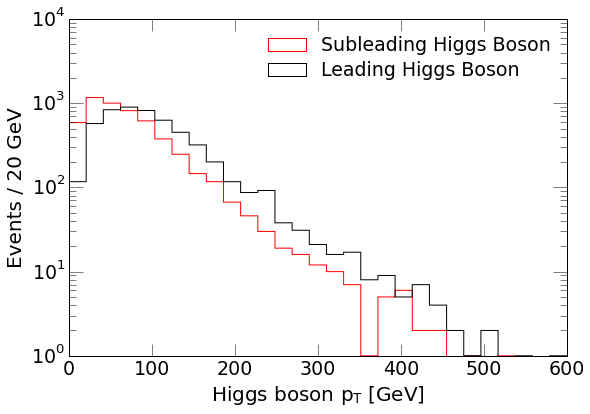

In [777]:
# -- Figure 1
bins = np.linspace(0,600,30)
_  = plt.hist(h_pts[:,0]/1000, bins = bins, label = 'Subleading Higgs Boson', color = 'red', histtype = 'step')
_  = plt.hist(h_pts[:,1]/1000, bins = bins, label = 'Leading Higgs Boson', color = 'black', histtype = 'step')
plt.yscale('log')
plt.xlabel(r'Higgs boson p$_{T}$ [GeV]')
plt.ylabel('Events / 20 GeV')
plt.legend()
plt.show()

In [778]:
100 * float(sum(h_pts[:,0] > 150000)) / float(len(h_pts))

8.286252354048964

In [779]:
100 * float(sum(h_pts[:,0] > 200000)) / float(len(h_pts))

3.4274952919020714

In [780]:
100 * float(sum(h_pts[:,0] > 300000)) / float(len(h_pts))

0.7721280602636534

In [554]:
# -- need event selection including a mass window cut on m_bb

• the decay angle of the Higgs bosons in the rest frame of the 4b system, Θ∗;

• the decay angles of the b-quarks in the rest frame of the Higgs bosons, θ1 and θ2;

• the angle between the decay planes of the two Higgs bosons, Φ;

• the angle between one of the above decay planes and the decay plane of the two-Higgs system, Φ1;

• the two dijet invariant masses, m12 and m34;

• the invariant mass of the 4b system, mX;

• the pT of the 4b system, pT,X; and

• the rapidity of the 4b system, yX.

In [781]:
PhiB = []
v_saveB = []
for ev in xrange(len(bjets_2_corr04)):
    
    b0 = Vector3( bjets_2_corr04[ev][0].lv.x(), bjets_2_corr04[ev][0].lv.y(), bjets_2_corr04[ev][0].lv.z() )
    b1 = Vector3( bjets_2_corr04[ev][1].lv.x(), bjets_2_corr04[ev][1].lv.y(), bjets_2_corr04[ev][1].lv.z() )
    v = b0.Cross(b1)
    v_saveB.append(v)
    
    y0 = Vector3( photons_2[ev][0].lv.x(), photons_2[ev][0].lv.y(), photons_2[ev][0].lv.z() )
    y1 = Vector3( photons_2[ev][1].lv.x(), photons_2[ev][1].lv.y(), photons_2[ev][1].lv.z() )
    w = y0.Cross(y1)
    
    PhiB.append(v.Angle(w))

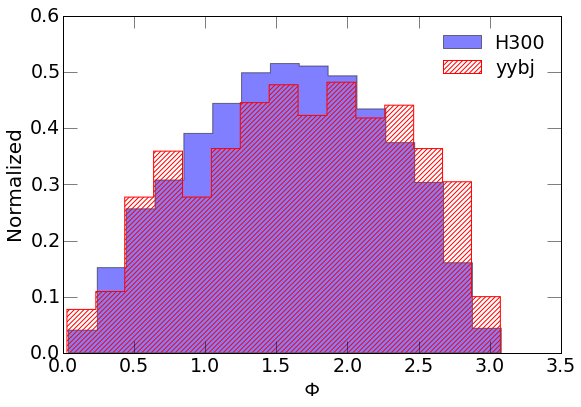

In [841]:
_ = plt.hist(np.array(Phi)[mass_windowS], bins = 15, alpha = 0.5, histtype = 'stepfilled', normed = True, label = 'H300') 
_ = plt.hist(np.array(PhiB)[mass_windowB], bins = 15, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////') 
plt.xlabel(r'$\Phi$')
plt.ylabel('Normalized')
plt.legend()
plt.show()
# idk why the have negative angles too... the angle between two planes can always be taken as positive
# Angle uses acos(x), which always gives you the positive option, I guess:
# "Principal arc cosine of x, in the interval [0,pi] radians." from C++


In [783]:
Phi1B = []
for ev in xrange(len(hh)):
    a0 = Vector3( hh[ev][0].x(), hh[ev][0].y(), hh[ev][0].z())
    a1 = Vector3( hh[ev][1].x(), hh[ev][1].y(), hh[ev][1].z())
    u = a0.Cross(a1)
    
    Phi1B.append( u.Angle(v_save[ev]) )

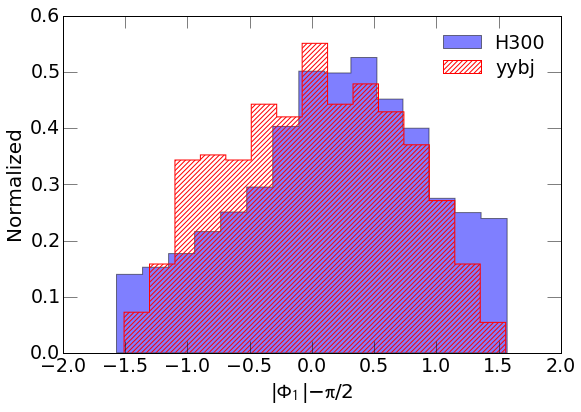

In [840]:
_ = plt.hist(np.abs(Phi1)[mass_windowS]-math.pi/2, bins = 15, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.abs(Phi1B)[mass_windowB]-math.pi/2, bins = 15, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////') 
plt.legend()
plt.xlabel(r'|$\Phi_1$|-$\pi$/2')
plt.ylabel('Normalized')
plt.show()

In [785]:
m12B = [bb04[ev].m() for ev in xrange(len(bb04))] # ok

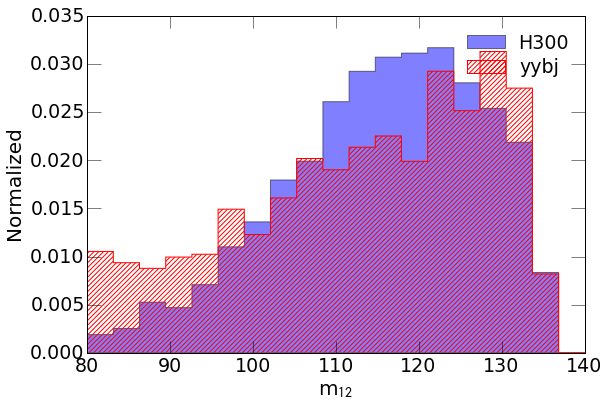

In [836]:
bins = np.linspace(80,140,20)
_ = plt.hist(np.array(m12S)[mass_windowS]/1000, bins = bins, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(m12B)[mass_windowB]/1000, bins = bins, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////') 
plt.legend()
plt.xlabel(r'm$_{12}$')
plt.ylabel('Normalized')
plt.show()

In [796]:
# -- replacing the invariant mass of the second bb system with m_yy
m34B = [yy[ev].m() for ev in xrange(len(yy))]# ok

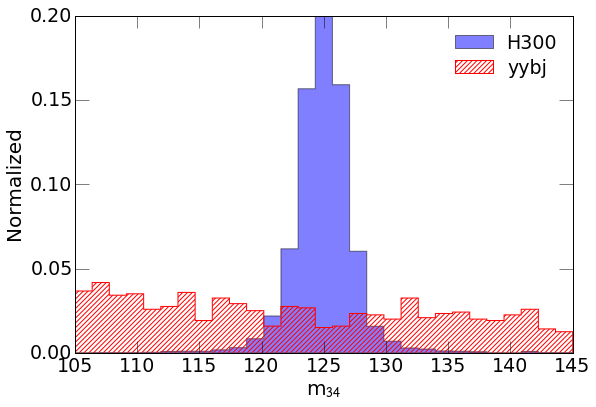

In [837]:
bins = np.linspace(105,145,30)
_ = plt.hist(np.array(m34S)[mass_windowS]/1000, bins = bins, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(m34B)[mass_windowB]/1000, bins = bins, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.ylim(ymax = 0.2)
plt.legend()
plt.xlabel(r'm$_{34}$')
plt.ylabel('Normalized')
plt.show()

In [802]:
mTXB = [yybb04[ev].m() for ev in xrange(len(yybb04))] # ok

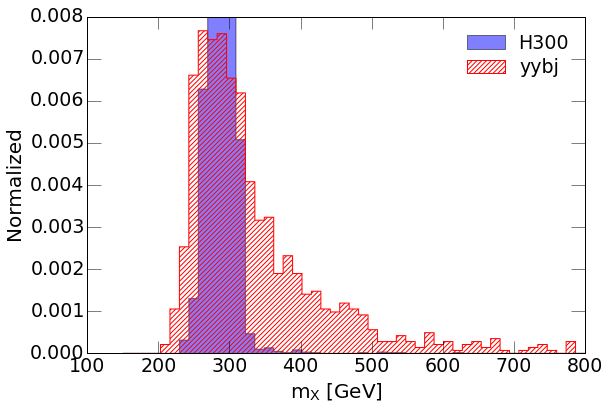

In [805]:
bins = np.linspace(150,800,50)
_ = plt.hist(np.array(mTXS)[mass_windowS]/1000, bins = bins, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(mTXB)[mass_windowB]/1000, bins = bins, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.legend()
plt.xlabel(r'm$_{X}$ [GeV]')
plt.ylabel('Normalized')
plt.show()

In [806]:
pTXB = [yybb04[ev].pt() for ev in xrange(len(yybb04))] # ok

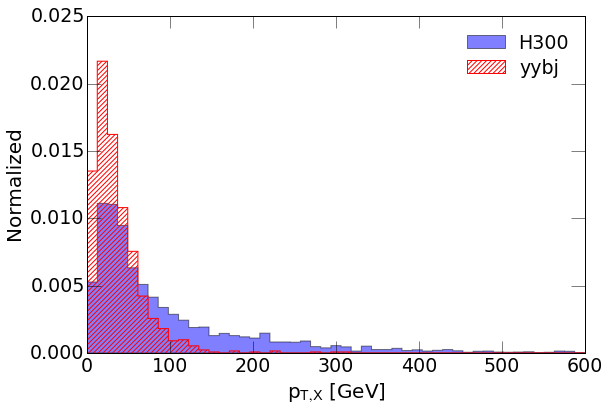

In [807]:
bins = np.linspace(0,600,50)
_ = plt.hist(np.array(pTXS)[mass_windowS]/1000, bins = bins, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(pTXB)[mass_windowB]/1000, bins = bins, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.legend()
plt.xlabel(r'p$_{T,X}$ [GeV]')
plt.ylabel('Normalized')
plt.show()

In [808]:
def rapidity(p4):
    import math
    pt = p4.pt()
    eta = p4.eta()
    m = p4.m()
    y = math.log( ( np.sqrt(m**2 + ( pt**2 * (math.cosh(eta))**2) ) + (pt * math.sinh(eta)) ) / (np.sqrt(m**2 + pt**2)))
    return y

In [809]:
yXB = [rapidity(yybb04[ev]) for ev in xrange(len(yybb04))] # ok

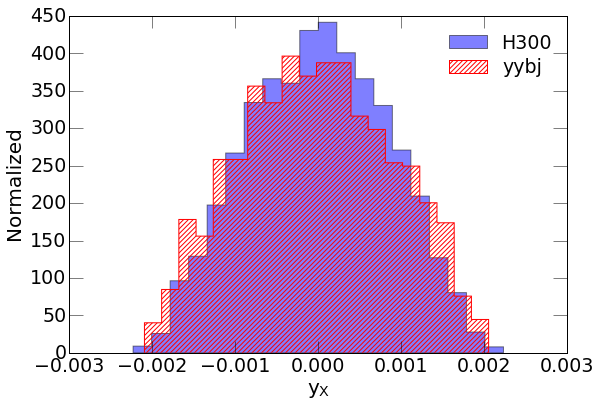

In [810]:
bins = 20
_ = plt.hist(np.array(yXS)[mass_windowS]/1000, bins = bins, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(yXB)[mass_windowB]/1000, bins = bins, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.legend()
plt.xlabel(r'y$_{X}$')
plt.ylabel('Normalized')
plt.show()

In [567]:
#B = np.eye(4) - t.gamma()*t.beta()*(nx*Kx+ny*Ky+nz*Kz) + (t.gamma()-1)*(nx*Kx+ny*Ky+nz*Kz)**2

In [811]:
# -- if interpreting this correctly, the calculations should be fine
# -- however, the values are very flat, not like in the paper
cosThetaB = []
for ev in range(len(hh)):
    t = yybb04[ev]
    # -- BOOSTING TO THE yybb REST FRAME FROM THE INITIAL FRAME
    # -- these lines will actually change hh!! Be careful when using it later!
    hh[ev][0].Boost(-t.BoostVector().x, -t.BoostVector().y, -t.BoostVector().z) 
    hh[ev][1].Boost(-t.BoostVector().x, -t.BoostVector().y, -t.BoostVector().z) 
    cosThetaB.append(hh[ev][0].CosTheta())
    cosThetaB.append(hh[ev][1].CosTheta())
# NOW hh IS IN THE yybb REST FRAME!

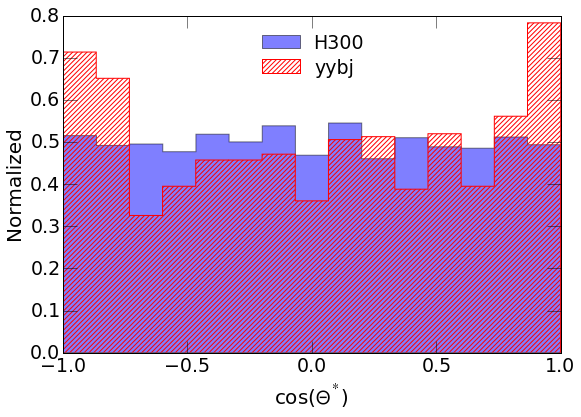

In [838]:
_ = plt.hist(np.array(cosTheta)[mass_windowS], bins = 15, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(cosThetaB)[mass_windowB], bins = 15, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.legend(loc = 'upper center')
plt.xlabel(r'cos($\Theta^*$)')
plt.ylabel('Normalized')
plt.show()

In [813]:
costheta1B = []
for ev in range(len(bjets_2_corr04)):
    p = bb04[ev]
    # -- BOOSTING TO THE bb REST FRAME FROM THE INITIAL FRAME
    (bjets_2_corr04[ev][0].lv).Boost(-p.BoostVector().x, -p.BoostVector().y, -p.BoostVector().z)
    (bjets_2_corr04[ev][1].lv).Boost(-p.BoostVector().x, -p.BoostVector().y, -p.BoostVector().z)
    costheta1B.append( (bjets_2_corr04[ev][0].lv).CosTheta() )
    costheta1B.append( (bjets_2_corr04[ev][1].lv).CosTheta() )
# NOW bjets_2_corr04 IS IN THE bb REST FRAME!

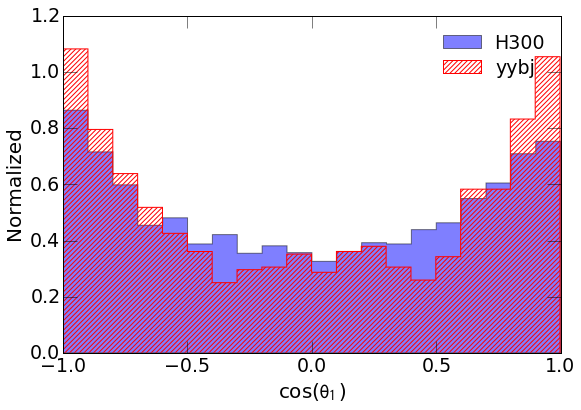

In [814]:
_ = plt.hist(np.array(costheta1)[mass_windowS], bins = 20, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(costheta1B)[mass_windowB], bins = 20, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.legend()
plt.xlabel(r'cos($\theta_1$)')
plt.ylabel('Normalized')
plt.show()

In [815]:
costheta2B = []
for ev in range(len(yy)):
    ph = yy[ev]
    # -- BOOSTING TO THE yy REST FRAME FROM THE INITIAL FRAME
    (photons_2[ev][0].lv).Boost(-ph.BoostVector().x, -ph.BoostVector().y, -ph.BoostVector().z)
    (photons_2[ev][1].lv).Boost(-ph.BoostVector().x, -ph.BoostVector().y, -ph.BoostVector().z)
    costheta2B.append( (photons_2[ev][0].lv).CosTheta() )
    costheta2B.append( (photons_2[ev][1].lv).CosTheta() )
# NOW photons_2 IS IN THE yy REST FRAME!

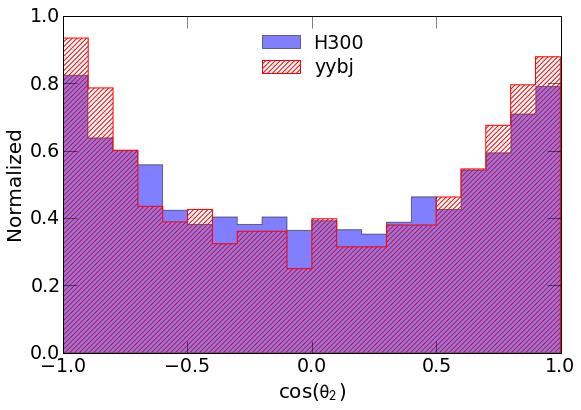

In [816]:
_ = plt.hist(np.array(costheta2)[mass_windowS], bins = 20, alpha = 0.5, histtype = 'stepfilled', normed = True,  label = 'H300')
_ = plt.hist(np.array(costheta2B)[mass_windowB], bins = 20, alpha = 1, histtype = 'step', normed = True, label = 'yybj',
            color = 'red', hatch = '/////')
plt.legend(loc = 'upper center')
plt.xlabel(r'cos($\theta_2$)')
plt.ylabel('Normalized')
plt.show()